In [2]:
# import packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly
import os

### Step 1: Import data

In [3]:
os.listdir()

['data_exploration.ipynb',
 'training_set_labels.csv',
 'submission_format.csv',
 'README.md',
 'training_set_features.csv',
 '.ipynb_checkpoints',
 '.git',
 'test_set_features.csv']

In [4]:
# read in the data
train = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")

In [6]:
train.shape

(26707, 36)

In [7]:
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Step 2: Analyze data

In [20]:
# get tabulation of each
tab = pd.crosstab(train['h1n1_concern'], train_labels['h1n1_vaccine'])


In [23]:
# rename
tab.columns = ["Didn't get vaccine", "Received vaccine"]
tab.index.names = ['Degree of H1N1 Concern']

In [39]:
tab['Proportion who received vaccine'] = tab["Received vaccine"] / (tab["Didn't get vaccine"]  + tab["Received vaccine"]) 


In [40]:
tab

,Didn't get vaccine,Received vaccine,Proportion who received vaccine
Degree of H1N1 Concern,,,
0.0,2849,447,0.135619
1.0,6756,1397,0.171348
2.0,8102,2473,0.233853
3.0,3250,1341,0.292093


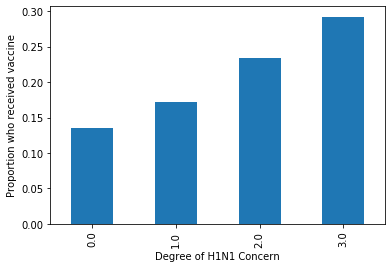

In [44]:
# plot proportion who received vaccine
tab['Proportion who received vaccine'].plot(kind = "bar")
plt.ylabel("Proportion who received vaccine")
plt.show()